# Graph SLAM Problem

$\min J(x_i) = x_0^T\Omega_0 x_0 + \sum_t e_t R_t^{-1} e_t  + \sum_t \sum_i \tilde{z}^i_t  Q_t^{-1} \tilde{z}^i_t \$

$ e_t \equiv x_t - g(u_t, x_{t-1})$ prediction error at time t

$\tilde{z}^i_t \equiv z^i_t - h(x_t, m^i_t)$ measurement error

$\dot{p_x} = v_x$

$\dot{p_y} = v_y$

$x_t = \begin{bmatrix} p_x \\ p_y \end{bmatrix}$
$u_t = \begin{bmatrix} v_x \\ v_y \end{bmatrix}$

$x_t = x_{t-1} + \Delta_t u_t $

$g(u_t, x_t{-1}) = x_{t-1}  + \Delta_t u_t$

Landmarks are points. And our measurement is relative position.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import casadi as ca
import slam2d

0.0

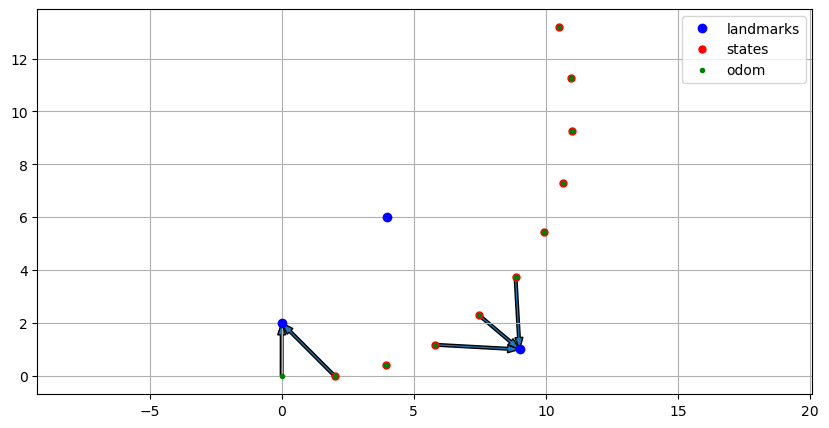

In [2]:
noise={
    'odom_std': 0,
    'bearing_std': 0,
    'range_std': 0,
    'odom_bx_bias': 0,
    'odom_by_bias': 0
}

plt.figure(figsize=(10, 5))

sim = slam2d.simulate(noise=noise, plot=True);

slam2d.J_graph_slam(sim['hist'], sim['x_odom_hist'], sim['landmarks'])

In [3]:
# data from sim
odom = sim['hist']['odom']
l = sim['landmarks']
z = sim['hist']['z']

# initialize x guess from odom
x0 = sim['hist']['x']

# compute data associations
assoc = [ slam2d.data_association(x0[int(xi), :], np.array([rng, bearing]), l) for rng, bearing, xi in z ]
assoc

# build cost
f_J = slam2d.build_cost(odom, z, assoc, x0.shape[0], l.shape[0])

# compute cost , this is where we will send it to casadi nonlinear optim
f_J(x0, l)

DM(31.9244)